In [1]:
import pandas as pd
import numpy as np
import scipy
import regression as reg

import netpixi
import graph_tool_extras as gte

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
# g = gte.load('./rede_metricas.net.gz')

In [3]:
# g.add_vp('PPC')
# for v in g.vertices():
#     v['PPC'] = v['clustering'] * v['degree']

In [4]:
# gte.save(g, 'rede_hipotese.net.gz')

In [5]:
# r = netpixi.render('rede_hipotese.net.gz', infinite=True)

In [6]:
# time.sleep(5)
# r.vertex_default(size=4, bwidth=1)
# r.edge_default(width=1)

In [7]:
# r.vertex_scale('PPC', 10, 30)
# r.vertex_scale('PRC', 10, 30)

In [8]:
g = gte.load('./rede_hipotese.net.gz')

In [9]:
PRC = []
PPC = []
N_USERS = []
NAME = []
for v in g.vertices():
    NAME.append(v['name'])
    PRC.append(v['PRC'])
    PPC.append(v['PPC'])
    N_USERS.append(v['number of users purchased'])
PRC = np.log(PRC)
PPC = np.log(PPC)

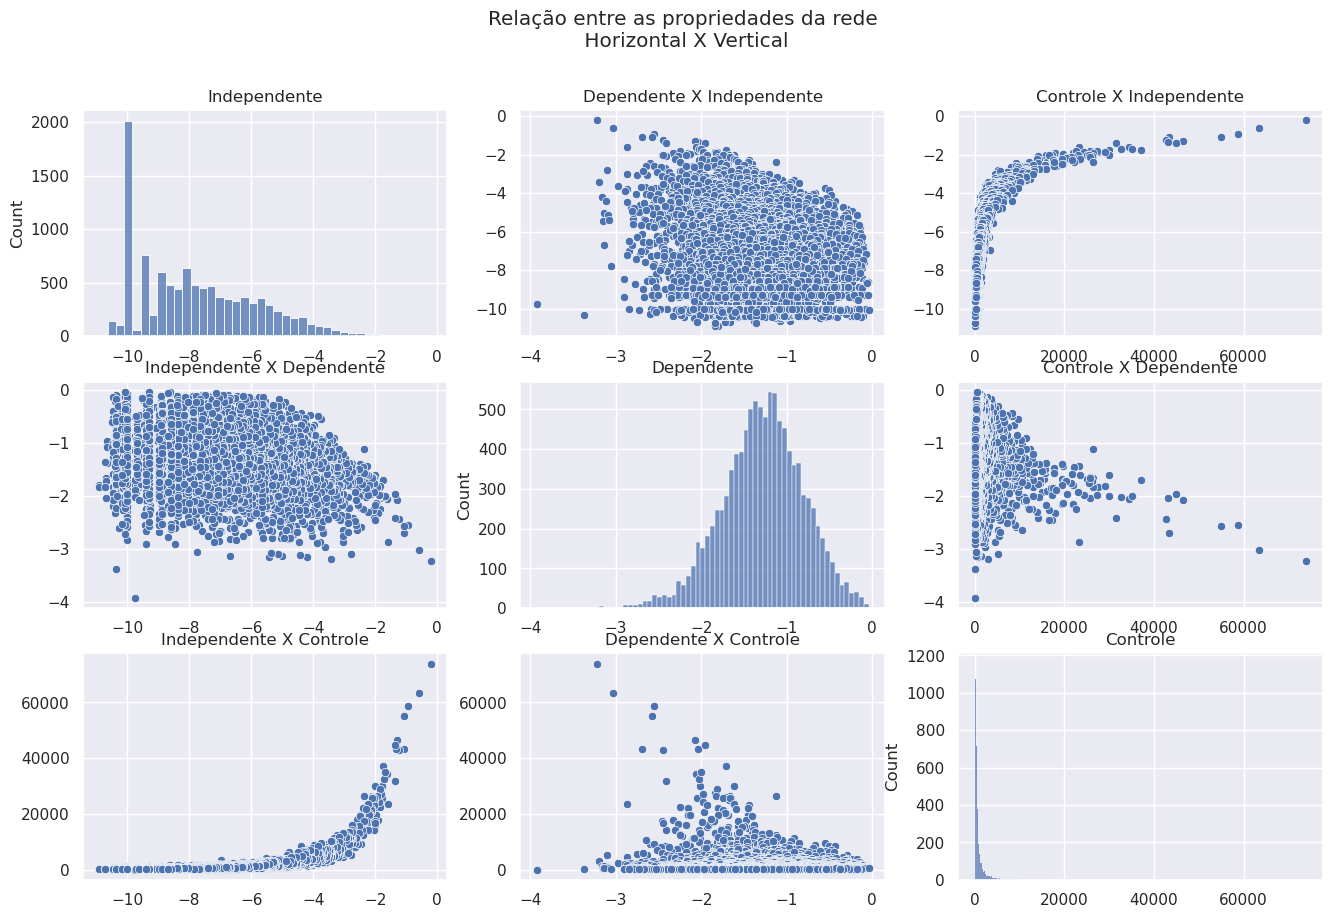

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

fig.suptitle("Relação entre as propriedades da rede\n Horizontal X Vertical")

sns.histplot(PPC, ax=axes[0, 0]).set_title("Independente")
sns.scatterplot(x=PRC, y=PPC, ax=axes[0, 1]).set_title("Dependente X Independente")
sns.scatterplot(x=N_USERS, y=PPC, ax=axes[0, 2]).set_title("Controle X Independente")

sns.scatterplot(x=PPC, y=PRC, ax=axes[1, 0]).set_title("Independente X Dependente")
sns.histplot(PRC, ax=axes[1, 1]).set_title("Dependente")
sns.scatterplot(x=N_USERS, y=PRC, ax=axes[1, 2]).set_title("Controle X Dependente")

sns.scatterplot(x=PPC, y=N_USERS, ax=axes[2, 0]).set_title("Independente X Controle")
sns.scatterplot(x=PRC, y=N_USERS, ax=axes[2, 1]).set_title("Dependente X Controle")
sns.histplot(N_USERS, ax=axes[2, 2]).set_title("Controle")

plt.show()

In [11]:
import os
if not os.path.isdir('img'):
    os.mkdir('img')

sns.histplot(PPC).get_figure().savefig('./img/hist_independente.png')
plt.close()
sns.scatterplot(x=PRC, y=PPC).get_figure().savefig('./img/dependente_independente.png')
plt.close()
sns.scatterplot(x=N_USERS, y=PPC).get_figure().savefig('./img/controle_independente.png')
plt.close()

sns.scatterplot(x=PPC, y=PRC).get_figure().savefig('./img/independente_dependente.png')
plt.close()
sns.histplot(PRC).get_figure().savefig('./img/hist_dependente.png')
plt.close()
sns.scatterplot(x=N_USERS, y=PRC).get_figure().savefig('./img/controle_dependente.png')
plt.close()

sns.scatterplot(x=PPC, y=N_USERS).get_figure().savefig('./img/independente_controle.png')
plt.close()
sns.scatterplot(x=PRC, y=N_USERS).get_figure().savefig('./img/dependente_controle.png')
plt.close()
sns.histplot(N_USERS).get_figure().savefig('./img/hist_controle.png')
plt.close()

In [12]:
def pearsonr(x, y, ndigits=10):
    statistic, p_value = scipy.stats.pearsonr(x, y)
    
    asterisk = ''
    statistic = round(statistic, ndigits)
    
    if statistic == 1: 
        asterisk = ' (óbvio)'
    elif p_value < 0.01: 
        asterisk = ' ***'
    elif p_value < 0.05: 
        asterisk = ' **'
    elif p_value < 0.1: 
        asterisk = ' *'
        
    return f'{statistic} {asterisk}'

In [13]:
data = [PPC, PRC, N_USERS]
result = pd.DataFrame([ [ pearsonr(j, i) for j in data ] for i in data ])
result

,0,1,2
0,1.0 (óbvio),-0.2947756738 ***,0.5708541708 ***
1,-0.2947756738 ***,1.0 (óbvio),-0.1402223782 ***
2,0.5708541708 ***,-0.1402223782 ***,1.0 (óbvio)


In [14]:
data = pd.DataFrame({
    'PPC'   : PPC,
    'PRC'   : PRC,
    'n_user': N_USERS,
    'name'  : NAME
})

In [15]:
data.sort_values('PPC', ascending=True).head(100)

,PPC,PRC,n_user,name
9857,-10.891657,-1.839012,55,Salmon & Sole Feast Cat Food
7850,-10.891657,-1.800270,81,Ocean Whitefish & Tuna Feast in Sauteed Seafoo...
10378,-10.718510,-1.834685,35,Superfood Currant Cacao & Hemp Seedbar
10499,-10.718265,-1.363989,122,Organix Butcher & Bushel Chicken Wing & Thigh ...
9062,-10.673934,-1.718292,74,"Turkey Jerky, Lemon Garlic"
...,...,...,...,...
9707,-10.368957,-1.341558,60,Sweet Potato Pie Chewy Fruit and Vegetable Snack
9836,-10.368933,-1.744357,177,Apple Cider Vinegar & Limeade Drink
10117,-10.368933,-1.588161,92,Organic Greens & Apple Juice
8322,-10.368933,-1.487193,135,ORGANIC Cocoa Mint Protein Single


In [16]:
result = reg.linear(data=data, formula='PRC ~ PPC + n_user') # dependente à esquerda!
result.micro_summary()

variable,coefficient,std error,p-value
PPC,-0.078457,0.002793,0.000000
n_user,0.000007,0.000002,0.000245


In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRC   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     507.8
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          2.90e-211
Time:                        14:48:15   Log-Likelihood:                -6613.3
No. Observations:               10521   AIC:                         1.323e+04
Df Residuals:                   10518   BIC:                         1.325e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8975      0.023    -80.928      0.000      -1.943      -1.852
PPC           -0.0785      0.003    -28.087      0.000      -0.084      -0.073
n_user      7.376e-06   2.01e-06      3.669      0.000    3.44e-06    1.13e-05
==============================================================================
Omnibus:                      152.431   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.620
Skew:                          -0.238   Prob(JB):                     9.91e-40
Kurtosis:                       3.429   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

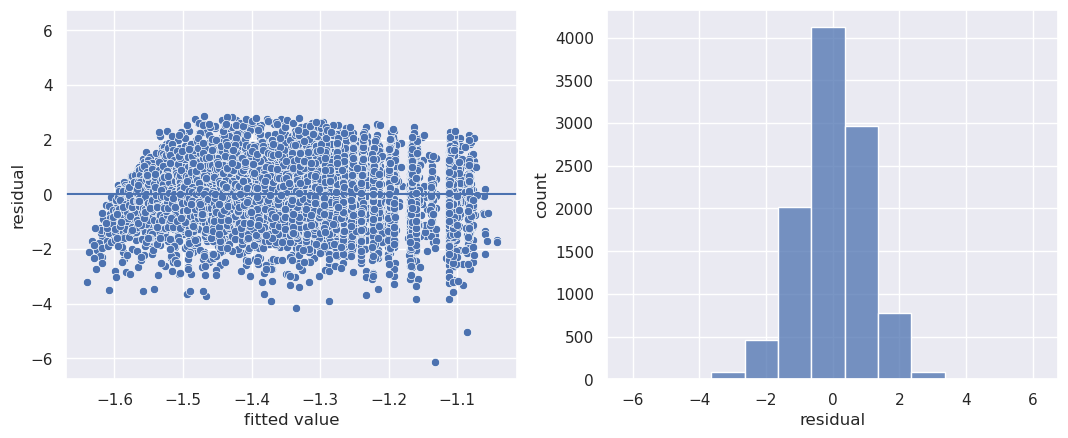

In [18]:
result.plot_residuals()